In [1]:
# It is common practice to look at the typical A/B test analysis steps and try to automate as much as possible. 
# In this challenge, you will have to analyze results from an A/B test. Also, you will be asked to design an algorithm
# to automate some steps

#### Project ####

# Company XYZ is a worldwide e-commerce site with localized versions of the site.
# Problem: Spain-based users have a much higher conversion rate than any other Spanish-speaking country. 
# Possible reason: translation. All Spanish-speaking ciuntries had the same translation of the site which was 
# written by a Spaniard. 
# Test: a test where each country would have its one translation written by a local. 
# After they run the test however, they are really surprised case the test is negative. i.e. it appears that the 
# non-localized translation was doing better.

# questions: 1 confirm that the test is actually negative. that is, it apears that the old version of the site with just
#              just one translation across Spain and LatAm performs better
#            2 Explain why that might be happening. Are the localized translations really worse?
#            3 If you identified what was wrong, design an algorithm that would return FALSE if the same problem is
#              happening in the future and TRUE if everything is good and the results can be trusted.

In [155]:
import warnings 
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math as mt
from scipy.stats import norm, ttest_ind

%matplotlib inline

In [12]:
test = pd.read_csv('/Users/.../Desktop/ds take home/A collection of Data Science take-home challenge/Spanish Translation A/Translation_Test/test_table.csv')
user = pd.read_csv('/Users/.../Desktop/ds take home/A collection of Data Science take-home challenge/Spanish Translation A/Translation_Test/user_table.csv')

test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [11]:
test.describe(include="all")

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
count,453321.000000,453321,453321,453321,453321,181877,453321,453321.000000,453321.000000
unique,NaN,5,3,2,3,5,7,NaN,NaN
top,NaN,2015-12-04,Ads,Web,ES,Facebook,Android_App,NaN,NaN
freq,NaN,141163,181877,251565,377547,68425,155135,NaN,NaN
mean,499937.514728,NaN,NaN,NaN,NaN,NaN,NaN,0.049579,0.476446
std,288665.193436,NaN,NaN,NaN,NaN,NaN,NaN,0.217073,0.499445
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,249816.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,500019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,749522.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000


In [10]:
user.describe(include="all")

,user_id,sex,age,country
count,452867.000000,452867,452867.000000,452867
unique,NaN,2,NaN,17
top,NaN,M,NaN,Mexico
freq,NaN,264485,NaN,128484
mean,499944.805166,NaN,27.130740,NaN
std,288676.264784,NaN,6.776678,NaN
min,1.000000,NaN,18.000000,NaN
25%,249819.000000,NaN,22.000000,NaN
50%,500019.000000,NaN,26.000000,NaN
75%,749543.000000,NaN,31.000000,NaN


In [14]:
# merge datasets
new = pd.merge(test,user,how="left",left_on="user_id",right_on="user_id",indicator=True)
new.head()
#pd.merge: merge DataFrame objects by performing a database-style join operation by columns or indexes
#pandas.merge(left,right,how="inner",on=None,left_on=None,right_on=None,left_index=False,right_index=False,
#             sort=False,suffixes=("_x","_y"),copy=True,indicator=Flase,validate=None)
# If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes
# or indexes on a column or columns, the index will be passed on
# left_index: use the index from the left DataFrame as the join keys. 
# rigth_index: use the index from the right DataFrame as the join key.
# suffixes: suffix to apply to overlapping column names in the left and right side, respecitively
# indicator: information columns is Categorical-type and takse on a value of "left-only" for observations whose
# merge key only appears in the "left" DataFrame, "right_only" for observations whose merge key only apprears
# in "right" DataFrame, and "both" if the observation's merge key is found in both
# validate: if specified, checks if merge is of specified type: "one_to_one", "one_to_many","many_to_one","many_to_many"

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,_merge
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain,both
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico,both
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain,both
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico,both
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico,both


In [23]:
# error: '<' not supported between instances of 'str' and 'float'
# missing values would be treated as float
# percentage of missing values
percent_missing=new.isnull().sum()*100/len(new)
missing_value=pd.DataFrame({"column_name":new.columns,"percent_missing":percent_missing})
missing_value.sort_values("percent_missing")
# when inplace=True is passed, the data is renamed in palce (it returns nothing); 
# when inplace=Flase(this is the default value) is passed, performs the operation and returns a copy of the object
missing_value
# there is no missing values in this project

,column_name,percent_missing
user_id,user_id,0.000000
date,date,0.000000
source,source,0.000000
device,device,0.000000
browser_language,browser_language,0.000000
ads_channel,ads_channel,59.878982
browser,browser,0.000000
conversion,conversion,0.000000
test,test,0.000000
sex,sex,0.100150


In [25]:
# change the missing value in sex,country, ads_channel as missing value
new[["sex","country","ads_channel"]]=new[["sex","country","ads_channel"]].fillna("")

In [29]:
# check unique values:
for column in new.columns:
    uniques = sorted(new[column].unique())
    print("{0:20s}\t{1:5d}\t".format(column,len(uniques)),uniques[:5])
# limit the showing unique alues to 5 in case space and time limitation 

user_id             	453321	 [1, 2, 3, 5, 8]
date                	    5	 ['2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04']
source              	    3	 ['Ads', 'Direct', 'SEO']
device              	    2	 ['Mobile', 'Web']
browser_language    	    3	 ['EN', 'ES', 'Other']
ads_channel         	    6	 ['', 'Bing', 'Facebook', 'Google', 'Other']
browser             	    7	 ['Android_App', 'Chrome', 'FireFox', 'IE', 'Iphone_App']
conversion          	    2	 [0, 1]
test                	    2	 [0, 1]
sex                 	    3	 ['', 'F', 'M']
age                 	   53	 [18.0, 19.0, 20.0, 21.0, 22.0]
country             	   18	 ['', 'Argentina', 'Bolivia', 'Chile', 'Colombia']
_merge              	    2	 ['both', 'left_only']


In [18]:
# check outliers for categorical data
# calculate the frequency of each unique variable
categorical = list(new.columns)
categorical.remove("user_id")
print(categorical)
for column in categorical:
    a = pd.crosstab(index=new[column],columns="count")
    print(a)

['date', 'source', 'device', 'browser_language', 'ads_channel', 'browser', 'conversion', 'test', 'sex', 'age', 'country', '_merge']
col_0        count
date              
2015-11-30   71025
2015-12-01   70991
2015-12-02   70649
2015-12-03   99493
2015-12-04  141163
col_0    count
source        
Ads     181877
Direct   90834
SEO     180610
col_0    count
device        
Mobile  201756
Web     251565
col_0              count
browser_language        
EN                 63137
ES                377547
Other              12637
col_0        count
ads_channel       
Bing         13689
Facebook     68425
Google       68180
Other         4148
Yahoo        27435
col_0         count
browser            
Android_App  155135
Chrome       101929
FireFox       40766
IE            61715
Iphone_App    46621
Opera          6090
Safari        41065
col_0        count
conversion        
0           430846
1            22475
col_0   count
test         
0      237338
1      215983
col_0   count
sex          
F 

In [31]:
####### Question One: it appears that the old version of the site with just one translation across Spain and LatAm performs
# old_version performance
old_version_mean = new[new.test==0][["conversion","country"]].groupby("country").mean()
print("the highest conversion rate:",
old_version_mean.max())
print("the highet conversion country in control group:", old_version_mean.idxmax(axis=0))

the highest conversion rate: conversion    0.079719
dtype: float64
the highet conversion country in control group: conversion    Spain
dtype: object


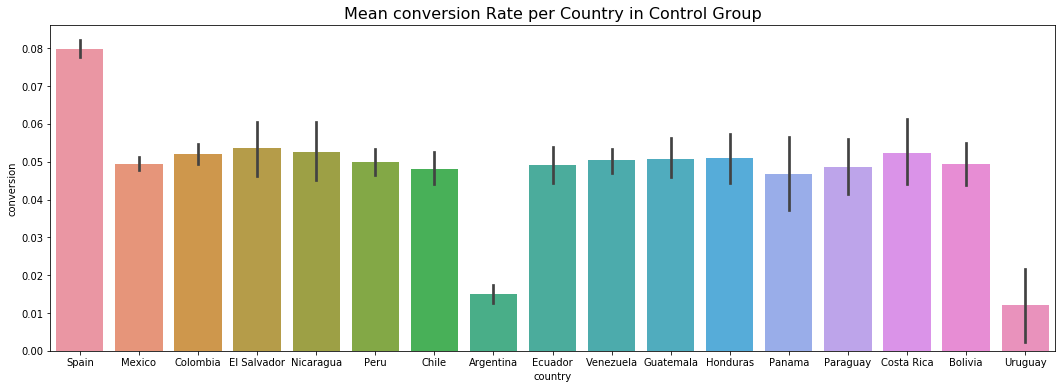

In [41]:
# visualize the result            
fig,ax=plt.subplots(figsize=(18,6))
sns.barplot(x="country",y="conversion",data=new[new.test==0],ax=ax)
ax.set_title("Mean conversion Rate per Country in Control Group",fontsize=16)
plt.show()

In [37]:
# two version comparation
two_group = new[["conversion","test"]].groupby("test").mean()
two_group

,conversion
test,
0,0.055179
1,0.043425


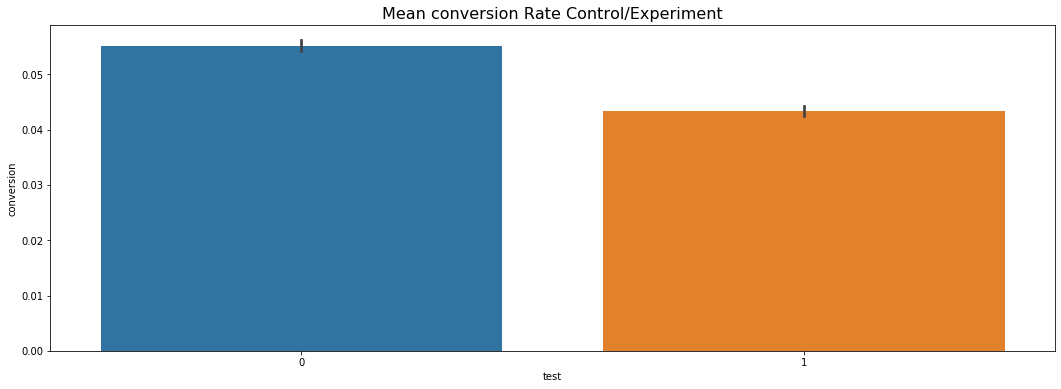

In [39]:
fig,ax=plt.subplots(figsize=(18,6))
sns.barplot(x="test",y="conversion",data=new,ax=ax)
ax.set_title("Mean conversion Rate Control/Experiment",fontsize=16)
plt.show()

In [40]:
# new_version performance
new_version_mean = new[new.test==1][["conversion","country"]].groupby("country").mean()
print("the highest conversion rate:",
new_version_mean.max())
print("the highet conversion country in experiment group:", new_version_mean.idxmax(axis=0))

the highest conversion rate: conversion    0.054738
dtype: float64
the highet conversion country in experiment group: conversion    Costa Rica
dtype: object


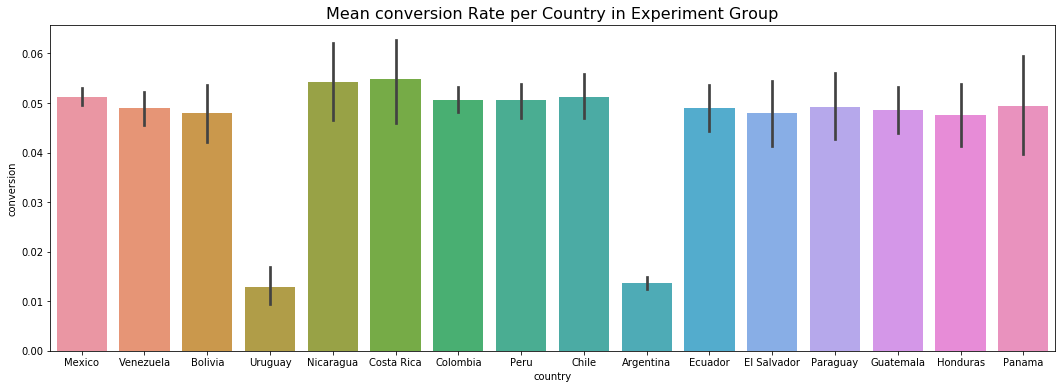

In [42]:
fig,ax=plt.subplots(figsize=(18,6))
sns.barplot(x="country",y="conversion",data=new[new.test==1],ax=ax)
ax.set_title("Mean conversion Rate per Country in Experiment Group",fontsize=16)
plt.show()

In [43]:
# Conclusion: old version performs better than new version
# in old version, there are 17 countries. But in new version, there are 16 countries.
# the reason leading to this might be the the additional country

In [46]:
new_test = new[new.country != "Spain"]
two_group_new = new_test[["conversion","test"]].groupby("test").mean()
two_group_new
# after deleting "Spain", control group still works better than experiment group
# Question 1: it is indeed a negative result for the test; conversion rate is dropping from 0.048 to 0.043

,conversion
test,
0,0.048330
1,0.043425


In [50]:
###### Question 2: Explain why that might be happening. Are the localized translations really worse?
# A/B testing: hypothesis test calculate if the difference is in the confidence interval
# here we conduct kolmogorove smirnov test to detect if the test and control groups are from same distribution
scipy.stats.ks_2samp(new_test[new_test.test==0]["conversion"],new_test[new_test.test==1]["conversion"])
# the null hypothesis is that both groups were sampled from populations with identical distribution
# this is a statistically sigificant result that both groups did not from the same population. So localized translation
# is statistically really worse

Ks_2sampResult(statistic=0.004905709178544049, pvalue=0.01639424421667436)

In [ ]:
###### Question 3:If you identified what was wrong, design an algorithm that would return FALSE if the same problem is
#              happening in the future and TRUE if everything is good and the results can be trusted.
# potential reason: 1 duration and sample size
#                   2 sanity check

In [53]:
# check experimental sample size
def get_sds(p,d):
    sd1 = mt.sqrt(2*p*(1-p))
    sd2 = mt.sqrt(p*(1-p)+(p+d)*(1-(p+d)))
    x = [sd1,sd2]
    return x

def get_z_score(alpha):
    return norm.ppf(alpha)

def get_sampSize(sds,alpha,beta,d):
    n = pow((get_z_score(1-alpha/2)*sds[0]+get_z_score(1-beta)*sds[1]),2)/pow(d,2)
    return n

In [56]:
# calculate sample size for conversion rate
# Practical siginificance: 1%
CR={}
CR["d"]=0.01
CR["p"]=old_version_mean.mean()
CR["Sample"]=round(get_sampSize(get_sds(CR["p"],CR["d"]),0.05,0.2,CR["d"]))
CR["Sample"]

7336.0

In [58]:
# so that means we need 7336 converted people per group and that means we need 153850 sample data points 
CR["Sample_all"]=CR["Sample"]/CR["p"]
CR["Sample_all"]
#test         
#0      237338
#1      215983
#we have enough sample points in this question

conversion    153850.767352
dtype: float64

Text(0.5, 1.0, 'Conversion Rate per Date')

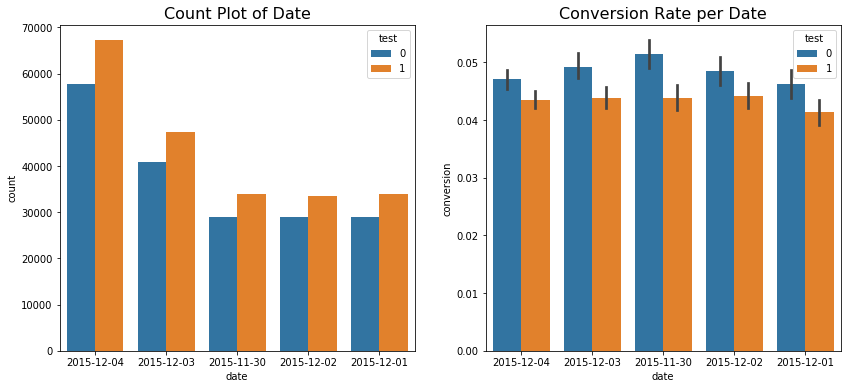

<Figure size 1008x360 with 0 Axes>

In [60]:
# check the duration
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.countplot(x="date",hue="test",data=new_test,ax=ax[0])
ax[0].set_title("Count Plot of Date",fontsize=16)
plt.figure(figsize=(14,5))
sns.barplot(x="date",y="conversion",hue="test",data=new_test,ax=ax[1])
ax[1].set_title("Conversion Rate per Date", fontsize=16)
# The duration include high volumn and low volumn dates
# It should be good. But it would be better to have a longer duration: maybe customers have learn effect

In [67]:
# sanity check:
columns = list(new_test.columns)
remove=["user_id","date","ads_channel","test","_merge"]
final_list =list(set(columns).difference(set(remove)))
final_list

['country',
 'browser',
 'browser_language',
 'age',
 'sex',
 'source',
 'device',
 'conversion']

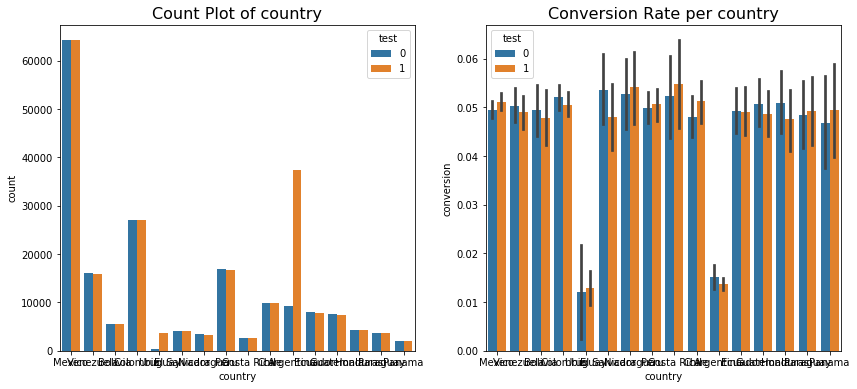

<Figure size 1008x360 with 0 Axes>

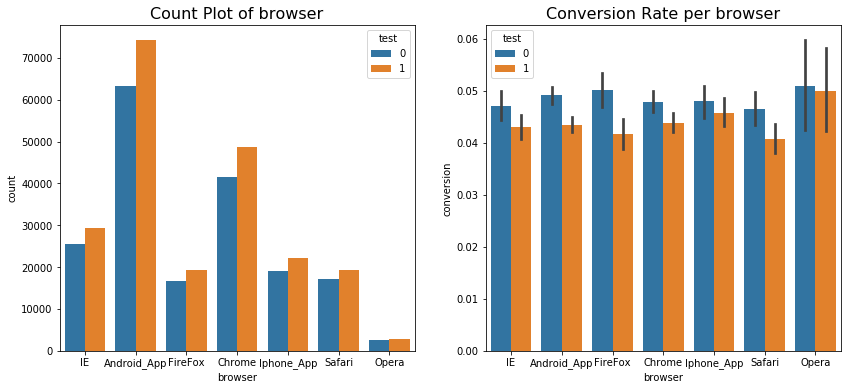

<Figure size 1008x360 with 0 Axes>

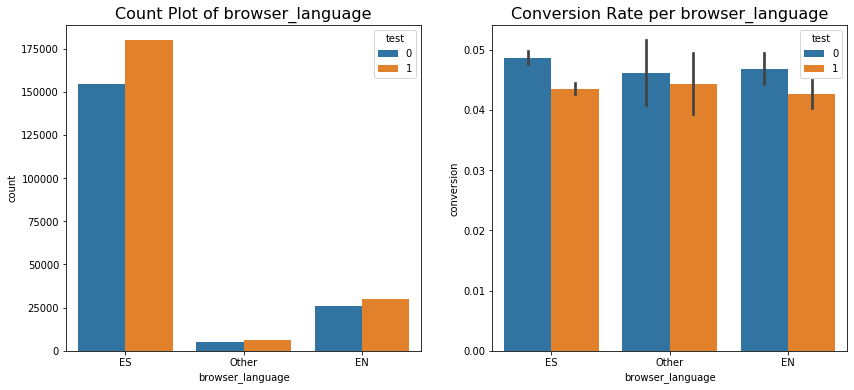

<Figure size 1008x360 with 0 Axes>

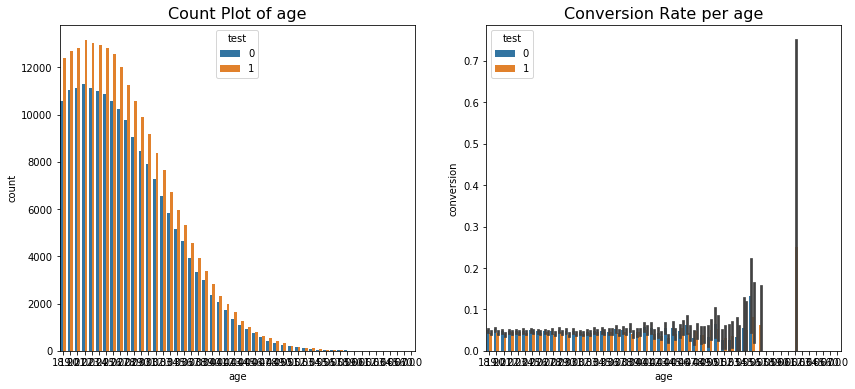

<Figure size 1008x360 with 0 Axes>

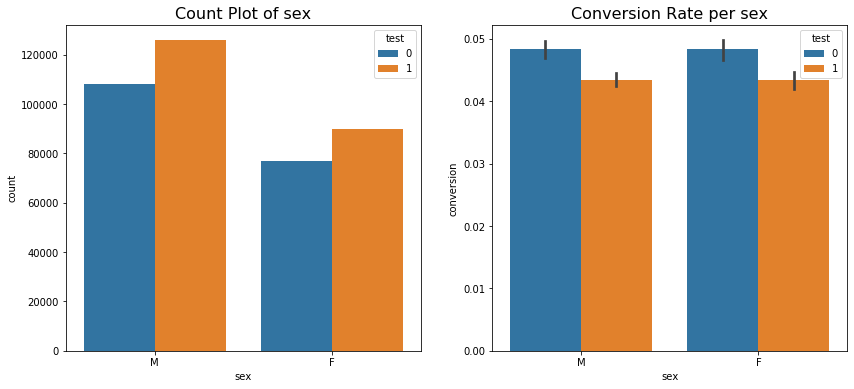

<Figure size 1008x360 with 0 Axes>

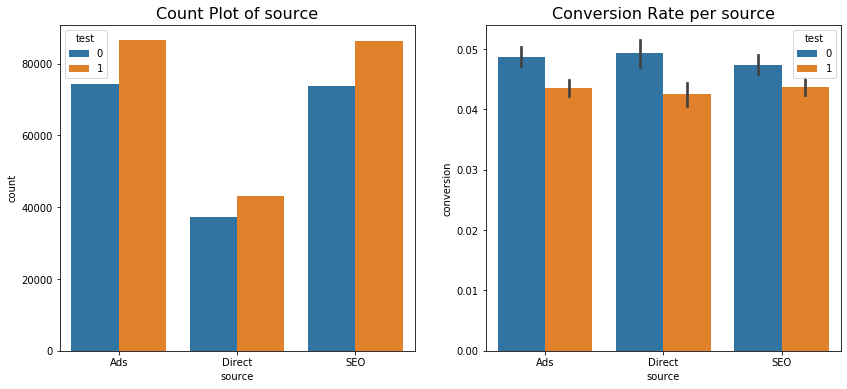

<Figure size 1008x360 with 0 Axes>

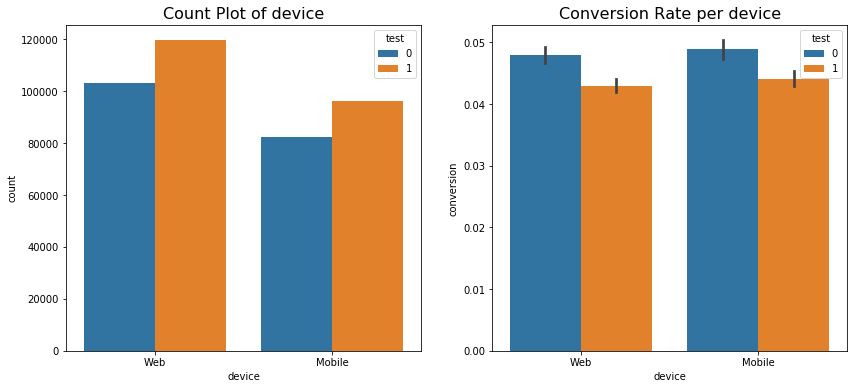

<Figure size 1008x360 with 0 Axes>

In [70]:
for column in final_list:
    if column != "conversion":
        fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
        sns.countplot(x=column,hue="test",data=new_test,ax=ax[0])
        ax[0].set_title("Count Plot of %s" %column,fontsize=16)
        plt.figure(figsize=(14,5))
        sns.barplot(x=column,y="conversion",hue="test",data=new_test,ax=ax[1])
        ax[1].set_title("Conversion Rate per %s" %column, fontsize=16)

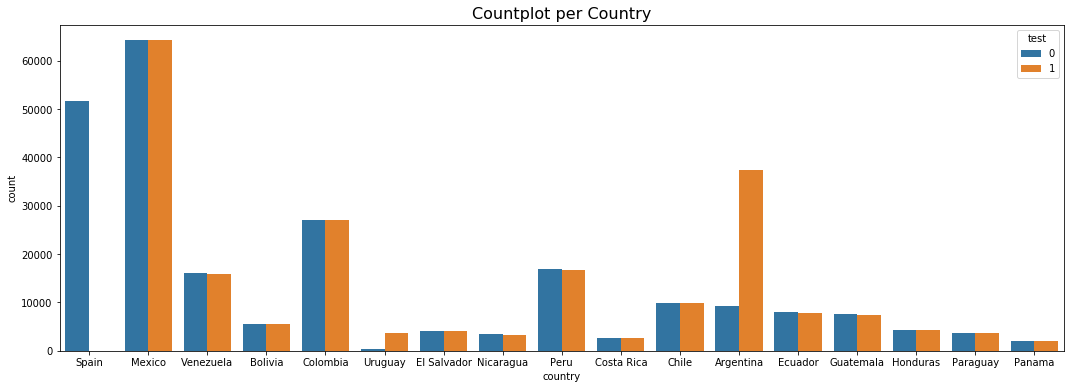

In [71]:
# According to the distribution plot, there are two countries we have extrem high test counts but 
# low conversion rate. This uneven distribution between test and control groups might be the reason
fig,ax=plt.subplots(figsize=(18,6))
sns.countplot(x="country",hue="test",data=new,ax=ax)
ax.set_title("Countplot per Country",fontsize=16)
plt.show()

In [81]:
# calculate the conversion rate after deleting Uruguay and Argentina
new_test2 = new[~new["country"].isin(["Argentina","Uruguay","Spain"])]
two_group_new2 = new_test2[["conversion","test"]].groupby("test").mean()
two_group_new2
# after the adjustment, the test group works better

,conversion
test,
0,0.050186
1,0.050421


In [82]:
scipy.stats.ks_2samp(new_test2[new_test2.test==0]["conversion"],new_test2[new_test2.test==1]["conversion"])
# cannot reject null hypothesis, so they came from same group
# new feature has no effect but there is no decrease for testing group

Ks_2sampResult(statistic=0.00023482193535606655, pvalue=1.0)

In [156]:
# conclusion: the problem is because the control and testing groups come from different distribution orginially
# there are more people from Argentina and Uruguay in testing groups and it happens that both of them have very low
# conversion rates. And it influences the final conversion rate.
# design an algorithm that would return FALSE if the same problem is
# happening in the future and TRUE if everything is good and the results can be trusted.
countries = [name for name in new['country'].unique() if name is not np.nan]

print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)

for country in countries:
    test_val = new[(new['country'] == country) & (new['test'] == 1)]['conversion'].values
    cont_val = new[(new['country'] == country) & (new['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))


Country               Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
Spain                       nan         0.07972        nan
Mexico                  0.05119         0.04949   0.165544
Venezuela               0.04898         0.05034   0.573702
Bolivia                 0.04790         0.04937   0.718885
Colombia                0.05057         0.05209   0.423719
Uruguay                 0.01291         0.01205   0.879764
El Salvador             0.04795         0.05355   0.248127
Nicaragua               0.05418         0.05265   0.780400
Peru                    0.05060         0.04991   0.771953
Costa Rica              0.05474         0.05226   0.687876
Chile                   0.05130         0.04811   0.302848
Argentina               0.01373         0.01507   0.335147
Ecuador                 0.04899         0.04915   0.961512
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091  

In [169]:
def checkcountry(new):     
    check1 = new[["test","country","user_id"]].groupby(["country","test"]).count()
    countries = [name for name in new['country'].unique() if name is not np.nan]
    for country in countries:
        a = check1.loc[country]
        b=int((a.iloc[0]-a.iloc[1])/a.iloc[0])
        if abs(b) > 0.1:
            print("there is an uneven group in country {0}".format(country),"and the deviation is {0}".format(b))
            return False
            break
    return True

In [170]:
checkcountry(new_test)

there is an uneven group in country Uruguay and the deviation is -7


False

In [164]:
# based on above algorithm we could find out if there is an uneven distribution
# once the algorithm found one uneven group we return false